# Abschlussprojekt


**Einleitung**  

In diesem Proket steht uns ein von einer Hochschuleinrichtung erstellter Datensatz (aus mehreren unzusammenhängenden Datenbanken) zu Verfügung, der sich auf Studierenden bezieht, die in verschiedenen Studiengängen eingeschrieben sind, z. B. Agrarwissenschaften, Design, Pädagogik, Krankenpflege, Journalismus, Management, Sozialwesen und Technik. Der Datensatz enthält Informationen zu Studierenden, die zum Zeitpunkt der Immatrikulation uns bekannt sind (akademischer Werdegang, demografische und sozioökonomische Faktoren) sowie die akademischen Leistungen der Studierenden am Ende des ersten und zweiten Semesters. 

<img src='/content/drive/MyDrive/Colab Notebooks/Cursos/BBQ_Kurs/grad.png' width='450px;'/>

**Problematik und Aufgaben**

Während viele Studierenden ihr Studium erfolgreich abschließen, müssen viele das Studium abbrechen. Das Ziel dieses Projektes besteht darin, neben einer ausführlichen Analyse der gegebenen Daten, ein Modell zu entwickeln, um das Schicksal einer zukünftigen Studierenden anhand derselben Daten mit einer zuverlässigen Präzision einschätzen zu können. 

Konkrete Fragen bezüglich einer präzisen Analyse sind dabei von großer Bedeutung. Wir wollen beispielsweise herausfinden, welche Eigenschaften und Faktoren beim Abschließen eines Studiums eine wichtige Rolle spielen und welche Faktoren dabei eine relativ geringere Gewichtung haben.

_Erwünscht sind explorative Datenanalyse inklusive ansprechenden Visualisierungen und schließlich ein trainiertes, bzw. verfeinertes Modell (auch gern als Datei)._  

_**Kommentare zu jedem Schritt sind gern gesehen**_  
_**Zeitaufwand: 180 Minuten**_

## Import libraries and data




In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


data = "/content/drive/MyDrive/Colab Notebooks/Cursos/BBQ_Kurs/data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:

df =  pd.read_csv(data, sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Analys

In [63]:
# We see that the "target" is object type
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [64]:
# Convert the non-numeric data in Target into numeric
le = LabelEncoder()

df["Target"] = le.fit_transform(df["Target"])

In [81]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's occupation,Admission grade,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,5,127.3,...,0,0,0,0,0,0.000000,0,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,3,142.5,...,0,0,6,6,6,13.666667,0,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,9,124.8,...,0,0,6,0,0,0.000000,0,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,5,119.6,...,0,0,6,10,5,12.400000,0,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,9,141.5,...,0,0,6,6,6,13.000000,0,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,5,122.2,...,0,0,6,8,5,12.666667,0,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,9,119.0,...,0,0,6,6,2,11.000000,0,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,9,149.5,...,0,0,8,9,1,13.500000,0,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,7,153.8,...,0,0,5,6,5,12.000000,0,-0.8,-3.12,2


In [73]:
df["Target"]

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [65]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [66]:
# now let's see the correlation between the values to get a general idea
df_coor = df.corr()
df_coor

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


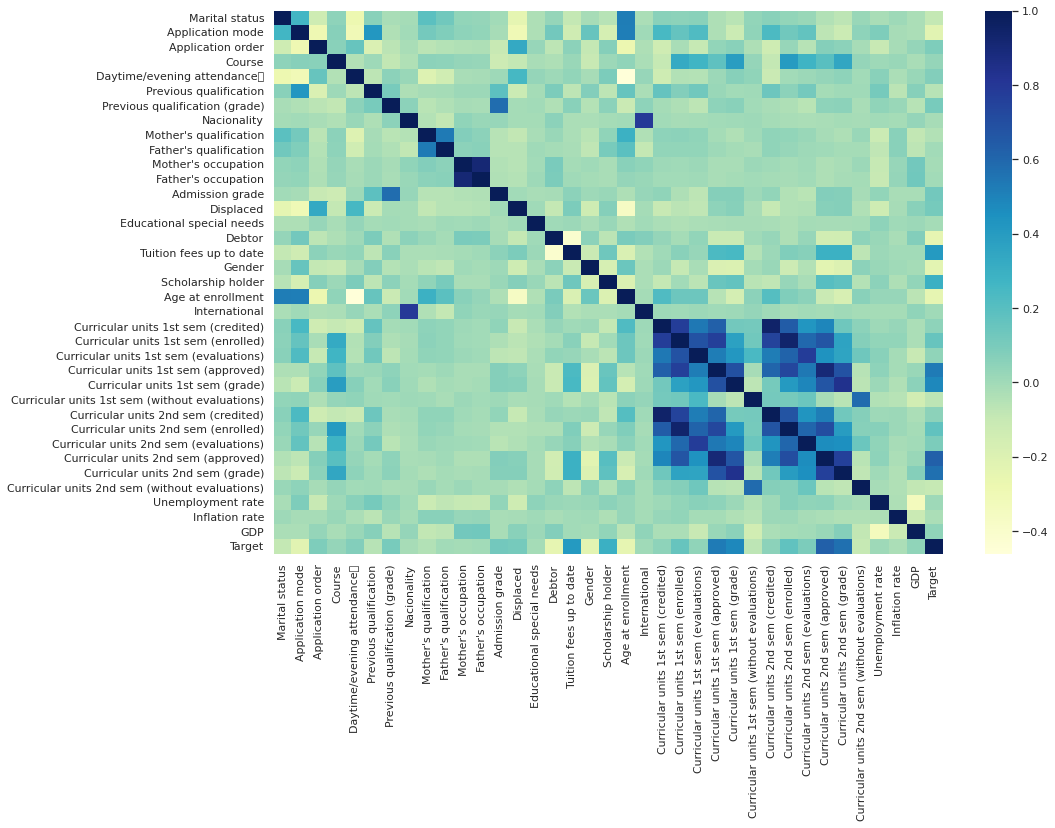

In [67]:
#  Now with sns
sb.set(rc = {'figure.figsize':(15,10)})
sb.heatmap(df_coor, cmap="YlGnBu")

In [68]:
#  But we are particularly interested in the Target column
df_coor.iloc[-1]

Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

## Data Preparation

In [ ]:
# we can see that there are elements that we could eliminate since they do not add value to our prediction model for Traget, for example:
# Father's qualification                           -0.001393
# Mother's occupation                              -0.005629
# Father's occupation                              -0.001899
# Unemployment rate                                 0.008627
df = df.drop(["Father's qualification", "Mother's qualification", "Father's occupation", "Unemployment rate", "International"], axis = 1)


In [74]:
# Now splitting our DataSet into Train and Test.

X,y = df.iloc[:,0:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2964, 31) (2964,)
(1460, 31) (1460,)


In [76]:
#  we processing the data

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train.shape)
print(rescaledX_test.shape)

(2964, 31)
(1460, 31)


## Logistic Regression Model

In [78]:
# Fitting with a logistic regression model
logreg = LogisticRegression(solver='lbfgs')

logreg.fit(rescaledX_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [83]:
# We evaluating our prediction
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.7410958904109589
[[342  75  69]
 [ 51  94 124]
 [ 18  41 646]]


In [ ]:
# Our model accuracy almost 75%!!!

## Grid search

In [ ]:
# The confusion matrix tells us that we can improve the model. let's use the grid search.

# We define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# we create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X_train)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y_train)



In [91]:
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Accuracy of logistic regression classifier: ",best_score)

Accuracy of logistic regression classifier:  0.7607965680689122


In [ ]:
# We habe improved the accuracy obout 3 %

## K Nearest Neighbors

In [93]:
# instance
knn = KNeighborsClassifier(n_neighbors=1)
# training data
knn.fit(X_train,y_train)
# Predict Values wih KNN
pred = knn.predict(X_test)


KNeighborsClassifier(n_neighbors=1)

In [96]:
##  Create a confusion matrix and classification report.
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

           0       0.63      0.53      0.58       486
           1       0.31      0.28      0.29       269
           2       0.66      0.76      0.71       705

    accuracy                           0.59      1460
   macro avg       0.53      0.52      0.52      1460
weighted avg       0.59      0.59      0.59      1460



In [97]:
# The model return only about 60%, Now we can choosen another K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

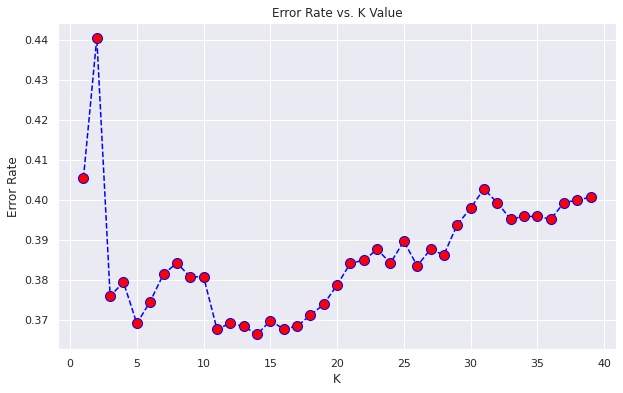

In [99]:
# see the information
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [108]:
# We can see that with KNN we do not get a better level of accuracy than with the other models.